## 다음 셀에 주어진 데이터를 이용해서 linear regression (선형 회귀) 문제를 
1. least square, 
2. batch gradient, 
3. stochastic gradient, 
4.mini-batch gradient 

## 방식으로 푸는 python 코드를 작성하시오.

(500,)


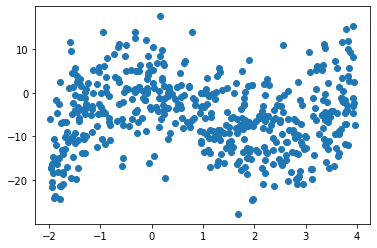

In [21]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
np.random.seed(42)

m=500

x=6*np.random.rand(m,1)-2
y=x**3-3*x**2-3*x+7*np.random.randn(m,1)

plt.scatter(x,y)
x=x.flatten()
y=y.flatten()
print(np.shape(x))

## 1. Least Square

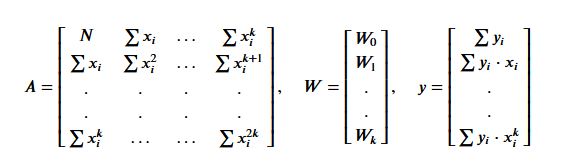

$AW=y$

$W=(A^T A)^{-1}A^Ty$

$A=(A^T A)^{-1}$ 

$y=A^Ty$


In [22]:
degree=3
W = [np.random.random() for _ in range(degree + 1)] #+1 is for W_0

def update_weights(degree, x, y):
    A = np.linalg.inv(np.array( 
        [ [sum(np.power(x, i)) for i in range(j, degree + 1 + j)] for j in range(degree + 1) ]
    ))

    return np.dot(A, np.array( [ sum(y * np.power(x, i)) for i in range(degree+1) ] ))

def predict(W, x):
    return sum([W[i] * x**i for i in range(len(W))])
    
W = update_weights(degree, x, y)
g = predict(W, x)

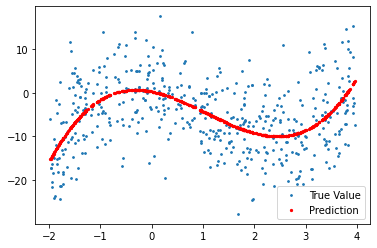

In [23]:
def plot_predictions(x_tr, y_tr, g):

    plt.scatter(x_tr, y_tr, s = 3, label = 'True Value')
    plt.scatter(x_tr, g, s=5,label = 'Prediction',color='r')
    plt.legend()
    
    plt.show()
    
g = sum([W[i] * x**i for i in range(len(W))])

plot_predictions(x, y, g)

## 2. Batch gradient descent

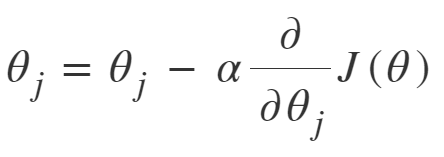

$J(W)= \frac{1}{2m} \sum^{m}_{i=1}(\hat{y}^i-y^i)^2$ (Mean Squared Error)

${\partial J(W) \over \partial W_j} = \frac{1}{m} \sum^{m}_{i=1}(\hat{y}^i-y^i)x^i_j$

In [24]:
errors = []
w1_grad = []

num_epoch=5000
learning_rate=0.001

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    
    y_hat = w1 * x+w2*(x**2)+w3*(x**3) + b

    error = ((y_hat - y)**2).mean()
    if error < 0.00001:
        break
        
    w1 = w1 - learning_rate * ((y_hat - y) * x).mean()
    w2 = w2 - learning_rate * ((y_hat - y) * (x**2)).mean()
    w3 = w3 - learning_rate * ((y_hat - y) * (x**3)).mean()
    
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f},b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2,w3, b, error))

print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f},w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2,w3,b, error))

 0 w1 = 0.66892, w2 = 0.62374, w3 = 0.07682,b = 0.66014 error = 391.33065
 5 w1 = 0.62587, w2 = 0.44911, w3 = -0.29434,b = 0.62499 error = 107.40027
10 w1 = 0.61587, w2 = 0.38178, w3 = -0.29388,b = 0.59984 error = 104.79415
15 w1 = 0.60742, w2 = 0.32070, w3 = -0.27605,b = 0.57562 error = 102.89938
20 w1 = 0.59900, w2 = 0.26103, w3 = -0.25772,b = 0.55188 error = 101.07674
25 w1 = 0.59055, w2 = 0.20253, w3 = -0.23969,b = 0.52859 error = 99.32207
30 w1 = 0.58208, w2 = 0.14515, w3 = -0.22199,b = 0.50575 error = 97.63279
35 w1 = 0.57357, w2 = 0.08887, w3 = -0.20462,b = 0.48335 error = 96.00639
40 w1 = 0.56503, w2 = 0.03368, w3 = -0.18756,b = 0.46138 error = 94.44048
45 w1 = 0.55647, w2 = -0.02044, w3 = -0.17081,b = 0.43983 error = 92.93276
50 w1 = 0.54788, w2 = -0.07352, w3 = -0.15436,b = 0.41869 error = 91.48100
55 w1 = 0.53927, w2 = -0.12558, w3 = -0.13822,b = 0.39796 error = 90.08307
60 w1 = 0.53063, w2 = -0.17664, w3 = -0.12237,b = 0.37763 error = 88.73692
65 w1 = 0.52197, w2 = -0.22672

2915 w1 = -1.94409, w2 = -2.95082, w3 = 0.90858,b = -0.39136 error = 49.20294
2920 w1 = -1.94523, w2 = -2.95113, w3 = 0.90875,b = -0.39066 error = 49.20218
2925 w1 = -1.94637, w2 = -2.95144, w3 = 0.90892,b = -0.38997 error = 49.20142
2930 w1 = -1.94750, w2 = -2.95175, w3 = 0.90909,b = -0.38927 error = 49.20066
2935 w1 = -1.94863, w2 = -2.95205, w3 = 0.90926,b = -0.38858 error = 49.19991
2940 w1 = -1.94975, w2 = -2.95236, w3 = 0.90943,b = -0.38788 error = 49.19916
2945 w1 = -1.95087, w2 = -2.95267, w3 = 0.90960,b = -0.38719 error = 49.19842
2950 w1 = -1.95198, w2 = -2.95298, w3 = 0.90977,b = -0.38649 error = 49.19768
2955 w1 = -1.95309, w2 = -2.95328, w3 = 0.90994,b = -0.38580 error = 49.19695
2960 w1 = -1.95420, w2 = -2.95359, w3 = 0.91011,b = -0.38511 error = 49.19621
2965 w1 = -1.95530, w2 = -2.95390, w3 = 0.91028,b = -0.38441 error = 49.19549
2970 w1 = -1.95640, w2 = -2.95420, w3 = 0.91044,b = -0.38372 error = 49.19477
2975 w1 = -1.95749, w2 = -2.95451, w3 = 0.91061,b = -0.38303 err

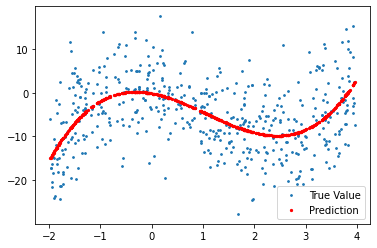

In [25]:
g=w1 * x+w2*(x**2)+w3*(x**3) + b
plot_predictions(x, y, g)

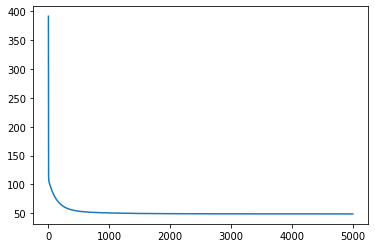

In [26]:
plt.plot(errors)

## 3. Stochastic gradient descent

$J(W)= (\hat{y}^i-y^i)^2$ (Mean Squared Error)

${\partial J(W) \over \partial W_j} = (\hat{y}-y)x_j$

In [27]:
errors = []
w1_grad = []

num_epoch=5000
learning_rate=0.001

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    rnd=np.random.randint(500)
    y_hat = w1 * x[rnd]+w2*(x[rnd]**2)+w3*(x[rnd]**3) + b

    error = ((y_hat - y[rnd])**2)
    #if error < 0.00001:
        #break
        
    w1 = w1 - learning_rate * ((y_hat - y[rnd]) * x[rnd])
    w2 = w2 - learning_rate * ((y_hat - y[rnd]) * (x[rnd]**2))
    w3 = w3 - learning_rate * ((y_hat - y[rnd]) * (x[rnd]**3))
    b = b - learning_rate * (y_hat - y[rnd])
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f},b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2,w3, b, error))

print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f},w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2,w3,b, error))

 0 w1 = 0.42259, w2 = 0.31462, w3 = 0.31263,b = 0.48869 error = 280.26596
 5 w1 = 0.52050, w2 = 0.63323, w3 = 1.56388,b = 0.49546 error = 2321.75221
10 w1 = 0.37000, w2 = -0.23349, w3 = -2.46646,b = 0.48981 error = 4722.55324
15 w1 = 0.51220, w2 = 0.13705, w3 = -1.55556,b = 0.54483 error = 53.97484
20 w1 = 0.54435, w2 = -0.01834, w3 = -1.44884,b = 0.50563 error = 802.03194
25 w1 = 0.85204, w2 = 1.20403, w3 = 3.04248,b = 0.60383 error = 18.73154
30 w1 = 0.40776, w2 = -0.11223, w3 = -0.91799,b = 0.45772 error = 632.88997
35 w1 = 0.41207, w2 = -0.17497, w3 = -0.90452,b = 0.43032 error = 26.96359
40 w1 = 0.50674, w2 = 0.25979, w3 = 0.81686,b = 0.43697 error = 206.30064
45 w1 = 0.43350, w2 = 0.07896, w3 = 0.41961,b = 0.38902 error = 9.22755
50 w1 = 0.34439, w2 = -0.22083, w3 = -0.36451,b = 0.34666 error = 156.65245
55 w1 = 0.40676, w2 = 0.04957, w3 = 0.76548,b = 0.35061 error = 2.55908
60 w1 = 0.28519, w2 = -0.20917, w3 = 0.01645,b = 0.30960 error = 162.48349
65 w1 = 0.29133, w2 = -0.17382,

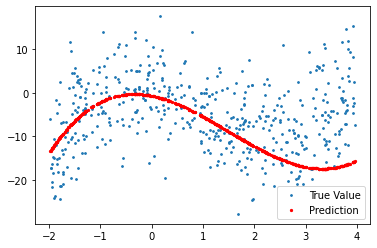

In [28]:
g=w1 * x+w2*(x**2)+w3*(x**3) + b
plot_predictions(x, y, g)

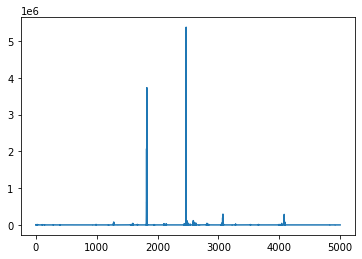

In [29]:
plt.plot(errors)

## 4. Mini-batch gradient descent

$J(W)= \frac{1}{2m} \sum^{m}_{i=1}(\hat{y}^i-y^i)^2$ (Mean Squared Error)

${\partial J(W) \over \partial W_j} = \frac{1}{m} \sum^{m}_{i=1}(\hat{y}^i-y^i)x^i_j$

In [30]:
errors = []
w1_grad = []

num_epoch=5000
learning_rate=0.001
mini_batch=20

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    rnd=np.random.randint(500,size=mini_batch)
    y_hat = w1 * x[rnd]+w2*(x[rnd]**2)+w3*(x[rnd]**3) + b

    error = ((y_hat - y[rnd])**2).mean()
    #if error < 0.00001:
        #break
        
    w1 = w1 - learning_rate * ((y_hat - y[rnd]) * x[rnd]).mean()
    w2 = w2 - learning_rate * ((y_hat - y[rnd]) * (x[rnd]**2)).mean()
    w3 = w3 - learning_rate * ((y_hat - y[rnd]) * (x[rnd]**3)).mean()
    b = b - learning_rate * (y_hat - y[rnd]).mean()
    
    errors.append(error)
    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f},b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2,w3, b, error))

print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f},w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2,w3,b, error))

 0 w1 = -0.51213, w2 = -0.41930, w3 = 0.30488,b = 0.86057 error = 296.70711
 5 w1 = -0.53292, w2 = -0.54964, w3 = 0.09644,b = 0.83284 error = 40.33074
10 w1 = -0.53840, w2 = -0.62760, w3 = 0.04884,b = 0.81182 error = 106.23056
15 w1 = -0.54276, w2 = -0.66406, w3 = 0.08288,b = 0.79551 error = 95.79722
20 w1 = -0.54793, w2 = -0.71473, w3 = 0.10406,b = 0.77826 error = 55.34518
25 w1 = -0.54789, w2 = -0.76074, w3 = 0.11467,b = 0.76202 error = 48.04161
30 w1 = -0.55408, w2 = -0.79192, w3 = 0.13470,b = 0.74591 error = 68.05071
35 w1 = -0.55228, w2 = -0.82703, w3 = 0.21008,b = 0.72521 error = 87.03710
40 w1 = -0.56344, w2 = -0.91683, w3 = 0.12104,b = 0.70053 error = 98.34321
45 w1 = -0.56383, w2 = -0.97285, w3 = 0.14150,b = 0.68031 error = 71.82264
50 w1 = -0.56708, w2 = -0.99514, w3 = 0.22165,b = 0.66514 error = 115.14185
55 w1 = -0.56280, w2 = -1.02117, w3 = 0.29488,b = 0.65122 error = 122.58399
60 w1 = -0.57480, w2 = -1.08501, w3 = 0.25533,b = 0.62868 error = 66.32742
65 w1 = -0.57190, w2 

2105 w1 = -1.90691, w2 = -3.04015, w3 = 0.89281,b = -0.06389 error = 47.61184
2110 w1 = -1.90428, w2 = -3.02992, w3 = 0.93296,b = -0.05924 error = 58.91469
2115 w1 = -1.90151, w2 = -3.03521, w3 = 0.94804,b = -0.06182 error = 56.60445
2120 w1 = -1.90664, w2 = -3.04111, w3 = 0.90933,b = -0.05840 error = 32.64150
2125 w1 = -1.90722, w2 = -3.04262, w3 = 0.87326,b = -0.05347 error = 69.37425
2130 w1 = -1.90218, w2 = -3.04403, w3 = 0.90470,b = -0.05457 error = 55.51473
2135 w1 = -1.89761, w2 = -3.03437, w3 = 0.93232,b = -0.05343 error = 55.14264
2140 w1 = -1.90085, w2 = -3.03318, w3 = 0.95243,b = -0.05523 error = 74.93716
2145 w1 = -1.90121, w2 = -3.03682, w3 = 0.92605,b = -0.05142 error = 69.45656
2150 w1 = -1.91273, w2 = -3.04952, w3 = 0.89088,b = -0.05142 error = 56.83396
2155 w1 = -1.90714, w2 = -3.06226, w3 = 0.88755,b = -0.05302 error = 47.01805
2160 w1 = -1.91348, w2 = -3.06137, w3 = 0.90567,b = -0.05305 error = 63.85800
2165 w1 = -1.91268, w2 = -3.05344, w3 = 0.94347,b = -0.05365 err

4255 w1 = -2.21220, w2 = -3.15091, w3 = 0.94114,b = 0.07757 error = 37.35706
4260 w1 = -2.21215, w2 = -3.15137, w3 = 0.94461,b = 0.07610 error = 34.09829
4265 w1 = -2.21278, w2 = -3.16476, w3 = 0.90440,b = 0.07366 error = 66.74823
4270 w1 = -2.21694, w2 = -3.14875, w3 = 0.93372,b = 0.07449 error = 63.26445
4275 w1 = -2.21272, w2 = -3.11671, w3 = 0.99817,b = 0.08106 error = 42.51971
4280 w1 = -2.21019, w2 = -3.12038, w3 = 0.99805,b = 0.07954 error = 24.01924
4285 w1 = -2.22010, w2 = -3.15291, w3 = 0.89458,b = 0.07832 error = 62.82139
4290 w1 = -2.21468, w2 = -3.12031, w3 = 0.98691,b = 0.08422 error = 45.23285
4295 w1 = -2.22036, w2 = -3.11512, w3 = 0.97001,b = 0.08450 error = 47.66161
4300 w1 = -2.22049, w2 = -3.12134, w3 = 0.97709,b = 0.08428 error = 113.12058
4305 w1 = -2.22444, w2 = -3.11874, w3 = 0.98933,b = 0.08602 error = 54.11744
4310 w1 = -2.22998, w2 = -3.14253, w3 = 0.92738,b = 0.08292 error = 50.31325
4315 w1 = -2.22955, w2 = -3.14663, w3 = 0.91117,b = 0.08318 error = 54.7871

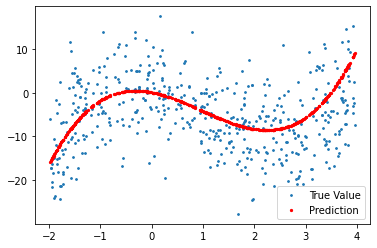

In [31]:
g=w1 * x+w2*(x**2)+w3*(x**3) + b
plot_predictions(x, y, g)

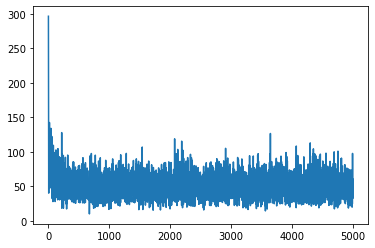

In [32]:
plt.plot(errors)